In [1]:
#https://kangbk0120.github.io/articles/2018-05/MDN

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [73]:
from keras import backend as K
from keras.optimizers import Adam

In [5]:
def generate_data(n_samples):
    epsilon = np.random.normal(size=n_samples)
    x_data = np.random.uniform(-10,10,n_samples)
    y_data = 7 * np.sin(0.75*x_data) + 0.5 * x_data + epsilon
    return x_data, y_data

In [6]:
x_data , y_data = generate_data(1000)

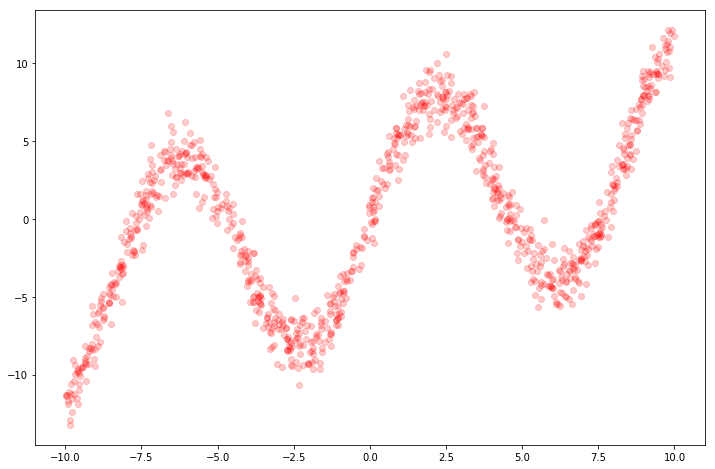

In [13]:
plt.figure(figsize=(12,8))
plt.plot(x_data,y_data,'ro',alpha = 0.2)
plt.show()

In [15]:
from keras.models import Input, Model
from keras.layers import Dense

In [56]:
def model_creation():
    input_layer = Input(shape = (1,))
    h1 = Dense(32,activation ='tanh')(input_layer)
    h2 = Dense(32,activation ='tanh')(h1)
    output = Dense(1, activation='linear')(h2)
    model = Model(inputs = input_layer, outputs = output)
    model.compile(loss='mse',optimizer = 'adam')
    return model
model = model_creation()

In [62]:
model.fit(x_data,y_data,epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 49us/step - loss: 1.1285
Epoch 2/100
1000/1000 [==============================] - 0s 40us/step - loss: 1.1765
Epoch 3/100
1000/1000 [==============================] - 0s 37us/step - loss: 1.2026
Epoch 4/100
1000/1000 [==============================] - 0s 38us/step - loss: 1.1785
Epoch 5/100
1000/1000 [==============================] - 0s 38us/step - loss: 1.1664
Epoch 6/100
1000/1000 [==============================] - 0s 37us/step - loss: 1.1948
Epoch 7/100
1000/1000 [==============================] - 0s 45us/step - loss: 1.1469
Epoch 8/100
1000/1000 [==============================] - 0s 40us/step - loss: 1.1921
Epoch 9/100
1000/1000 [==============================] - 0s 34us/step - loss: 1.2282
Epoch 10/100
1000/1000 [==============================] - 0s 40us/step - loss: 1.1964
Epoch 11/100
1000/1000 [==============================] - 0s 38us/step - loss: 1.1736
Epoch 12/100
1000/1000 [==============================] - 0s 39

1000/1000 [==============================] - 0s 38us/step - loss: 1.1453
Epoch 97/100
1000/1000 [==============================] - 0s 37us/step - loss: 1.1731
Epoch 98/100
1000/1000 [==============================] - 0s 42us/step - loss: 1.1648
Epoch 99/100
1000/1000 [==============================] - 0s 40us/step - loss: 1.1571
Epoch 100/100
1000/1000 [==============================] - 0s 40us/step - loss: 1.1403


In [63]:
res = model.predict(x_data)

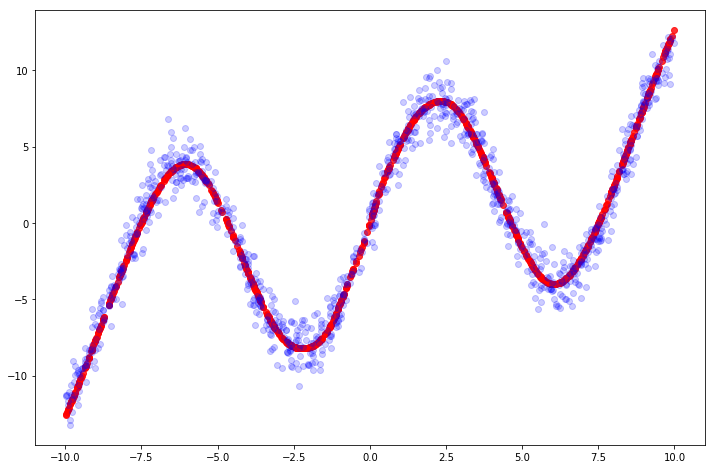

In [70]:
plt.figure(figsize=(12,8))
plt.plot(x_data,res,'ro',alpha = 0.8)
plt.plot(x_data,y_data,'bo',alpha = 0.2)
plt.show()

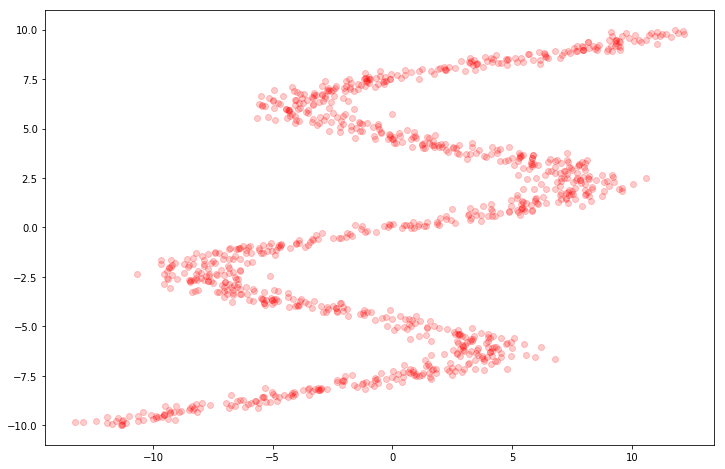

In [71]:
plt.figure(figsize=(12,8))
plt.plot(y_data,x_data,'ro',alpha = 0.2)
plt.show()

In [ ]:
#-log(sum(p(c=i|x)N(y;mu(i),sigma(i)))

In [76]:
mdn_lr = 0.005
class MDN:
    def __init__(self, n_hidden,n_gaussian):
        self.n_gaussian = n_gaussian
        self.n_hidden = n_hidden
        self.model = self.nn()
    def build_optimizer(self): #,y,mu,sigma
        #N(y;mu(i),sigma(i))) 를 나타내자
        #mu랑 sigma 어디서받아올거?
        mu_tensor = K.placehoder(dtype = 'float32', shape=[None,1])
        
        front_num = 1.0 / np.sqrt(2*np.pi)
        gaussian = K.sum((mu_tensor - mu)/sigma)
        gaussian = K.sum((gaussain * gaussain) * (-1/2))
        gaussian = K.exp(gaussian)
        gaussian = front_num * K.sum(sigma * gaussian)
        
    def mdn_loss(self, y, output):
        pi, mu, sigma = function(output) # function 만들어야함
        return cross_entropy(pi,y,mu,sigma)
    
    def cross_entropy(self,pi,y,mu,sigma):
        result = gaussian(y,mu,sigma) * (pi)
        result = K.sum(result)
        result = - K.log(result + 1e-8)
        return result
        
    
    def gaussian(self, y, mu, sigma):
        front_num = 1. / np.sqrt(2*np.pi)
        gaussian = y - mu
        gaussian = gaussian / sigma
        gaussian = K.square(gaussian)
        gaussian = (-1/2) * gaussian
        gaussian = K.exp(gaussian)
        gaussian = front_num * K.sum(1 / sigma) * gaussian
        return gaussian
    
        
    
    def nn(self):
        input_layer = Input(shape = (1,))
        h1 = Dense(32,activation = 'relu')(input_layer)
        h2 = Dense(32,activation = 'relu')(h1)
        mu = Dense(1, activation ='linear')(h2)
        sigma = Dense(1, activation = K.exp)(h2)
        pi = Dense(1, activation = 'softmax')(h2)
        model = Model(inputs = input_layer, outputs = [mu,sigma,pi])
        adam = Adam(lr = mdn_lr)
        model.compile(loss = mdn_loss(), optimizer = adam)
        return model

In [81]:
import math

In [82]:
math.sqrt(2)

1.4142135623730951

In [83]:
np.sqrt(2)

1.4142135623730951